In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
inout = pd.read_csv("DataSets/INOUT.csv")
line = pd.read_csv("DataSets/INOUTLINE.csv", low_memory=False)
prodins = pd.read_csv("DataSets/PRODUCTINSTANCE.csv", encoding='cp1252', low_memory=False)
prod = pd.read_csv("DataSets/PRODUCTS.csv", low_memory=False)
transitem = pd.read_csv("DataSets/TRANSFER_ITEM.csv", low_memory=False)
transitemd = pd.read_csv("DataSets/TRANSFER_ITEM_D.csv", low_memory=False)

In [3]:
inout.head()

,INOUT_ID,AD_CLIENT_ID,AD_ORG_ID,ISACTIVE,CREATED,CREATEDBY,UPDATED,UPDATEDBY,NAME,DESCRIPTION,...,STRING3,M_INOUT_AMVAL_ID,DOCUMENTNO1,LOCATIONS_ID,ACCT_AC_HOLDING_ID,VAHED_MALI,ACCT_AC_JOURNAL_ID,BASEINFO_RECORDID,C_YEAR_ID,Unnamed: 43
0,469637755,104000002,0,Y,6/28/2015 7:50,210619032,11/8/2017 11:15,210033614,NaN,69,...,NaN,NaN,69.0,NaN,1.0,200000138.0,470900574.0,NaN,NaN,NaN
1,469637756,104000002,0,Y,6/28/2015 7:50,210619032,6/28/2015 7:50,210619032,NaN,73,...,NaN,NaN,73.0,NaN,1.0,200000138.0,470900574.0,NaN,NaN,NaN
2,469637757,104000002,0,Y,6/28/2015 7:50,210619032,6/28/2015 7:50,210619032,NaN,206,...,NaN,NaN,206.0,NaN,1.0,200000138.0,470900574.0,NaN,NaN,NaN
3,469637758,104000002,0,Y,6/28/2015 7:50,210619032,6/28/2015 7:50,210619032,NaN,9405,...,NaN,NaN,9405.0,NaN,1.0,200000138.0,470900574.0,NaN,NaN,NaN
4,469637759,104000002,0,Y,6/28/2015 7:50,210619032,6/28/2015 7:50,210619032,NaN,346,...,NaN,NaN,346.0,NaN,1.0,200000138.0,470900574.0,NaN,NaN,NaN


In [8]:
print(inout.loc[:,['PITYPE']])
print(prodins.loc[:,['PITYPE']])

     PITYPE
0         l
1         l
2         l
3         l
4         l
...     ...
7595      l
7596      l
7597      l
7598      l
7599      l

[7600 rows x 1 columns]
       PITYPE
0           b
1         NaN
2           b
3           b
4         NaN
...       ...
706199    NaN
706200    NaN
706201    NaN
706202    NaN
706203    NaN

[706204 rows x 1 columns]


In [4]:
print(inout.loc[:,['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI']].mode())
print(inout.loc[:,['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI']].describe())
inout.loc[:,['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI']].max() - inout.loc[:,['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI']].min()

     CREATEDBY    UPDATEDBY  DOCUMENTNO  C_DOCSTATUS_ID  C_COSTCENTER_ID  \
0  210032662.0  210032662.0        25.0       3000025.0           1802.0   
1          NaN          NaN        71.0             NaN              NaN   

   COM_BPARTNER_ID  REQUESTNO   VAHED_MALI  
0      105003577.0   373087.0  200000138.0  
1              NaN        NaN          NaN  
          CREATEDBY     UPDATEDBY   DOCUMENTNO  C_DOCSTATUS_ID  \
count  7.600000e+03  7.600000e+03  7598.000000    7.600000e+03   
mean   2.850636e+08  2.858826e+08  3731.723480    3.000025e+06   
std    1.176677e+08  1.180468e+08  2200.373356    4.864308e+04   
min    2.100327e+08  2.100327e+08     1.000000    3.309000e+03   
25%    2.100327e+08  2.100327e+08  1825.250000    3.000025e+06   
50%    2.100327e+08  2.100327e+08  3728.500000    3.000025e+06   
75%    4.696374e+08  4.696374e+08  5635.750000    3.000025e+06   
max    4.696405e+08  4.707664e+08  7608.000000    6.000035e+06   

       C_COSTCENTER_ID  COM_BPARTNER_ID  

CREATEDBY          259607861.0
UPDATEDBY          260733739.0
DOCUMENTNO              7607.0
C_DOCSTATUS_ID       5996726.0
C_COSTCENTER_ID    469638288.0
COM_BPARTNER_ID    301397351.0
REQUESTNO             396707.0
VAHED_MALI         469718708.0
dtype: float64

Outlier Recognition

In [5]:
inoutSelectedData = inout.loc[:,['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI']]
inoutSelectedData.quantile()
Q1inout = inoutSelectedData.quantile(0.25)
Q3inout = inoutSelectedData.quantile(0.75)
IQRinout = Q3inout - Q1inout
print(inoutSelectedData < (Q1inout - 1.5 * IQRinout) | (inoutSelectedData > (Q3inout + 1.5 * IQRinout)))

      CREATEDBY  UPDATEDBY  DOCUMENTNO  C_DOCSTATUS_ID  C_COSTCENTER_ID  \
0         False      False       False           False            False   
1         False      False       False           False            False   
2         False      False       False           False            False   
3         False      False       False           False            False   
4         False      False       False           False            False   
...         ...        ...         ...             ...              ...   
7595      False      False       False           False            False   
7596      False      False       False           False            False   
7597      False      False       False           False            False   
7598      False      False       False           False            False   
7599      False      False       False           False            False   

      COM_BPARTNER_ID  REQUESTNO  VAHED_MALI  
0               False      False       False  
1    

In [6]:
line.head()

,INOUTLINE_ID,AD_CLIENT_ID,AD_ORG_ID,ISACTIVE,CREATED,CREATEDBY,UPDATED,UPDATEDBY,NAME,HELP,...,DEPRECATION_PERIOD,ESGHAT_VALUE,PELAK_FAREI,GROUH_DARAEI,VAHED_MALI,BASEINFO_RECORDID,C_YEAR_ID,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,210032666,104000002,0,Y,12/26/2013 9:50:13 AM,210035294,12/26/2013 9:50:42 AM,210035294,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,469637405,104000002,0,Y,6/20/2015 5:57:52 PM,210619039,6/21/2015 7:27:51 AM,210032662,NaN,NaN,...,NaN,NaN,NaN,NaN,200000138.0,NaN,NaN,NaN,NaN,NaN
2,469637426,104000002,0,Y,6/20/2015 6:09:15 PM,210032662,6/21/2015 7:27:52 AM,210032662,NaN,NaN,...,NaN,NaN,NaN,NaN,200000138.0,NaN,NaN,NaN,NaN,NaN
3,469637406,104000002,0,Y,6/20/2015 5:57:53 PM,210619039,6/21/2015 7:27:53 AM,210032662,NaN,NaN,...,NaN,NaN,NaN,NaN,200000138.0,NaN,NaN,NaN,NaN,NaN
4,469637407,104000002,0,Y,6/20/2015 5:57:53 PM,210619039,6/21/2015 7:27:54 AM,210032662,NaN,NaN,...,NaN,NaN,NaN,NaN,200000138.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print(line.loc[:,['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER','FEE']].mode())
print(line.loc[:,['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER','FEE']].describe())
line.loc[:,['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER', 'FEE']].max() - line.loc[:,['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER', 'FEE']].min()

   ACCUMULATEDEPRECIATION  BOOKVALUE  PRIMALVALUE     CONSUMER  FEE
0                     0.0        1.0          1.0  301567350.0  0.0
       ACCUMULATEDEPRECIATION     BOOKVALUE   PRIMALVALUE      CONSUMER  \
count            7.680000e+03  6.650300e+04  1.033420e+05  4.563100e+04   
mean             4.098806e+05  6.981809e+05  1.458704e+07  1.794850e+08   
std              4.051692e+06  5.364206e+06  1.849347e+08  1.007189e+08   
min              0.000000e+00  0.000000e+00  0.000000e+00  7.324000e+03   
25%              0.000000e+00  1.000000e+00  4.134000e+05  1.050036e+08   
50%              0.000000e+00  1.000000e+00  1.880000e+06  1.050046e+08   
75%              2.394000e+05  1.000000e+00  5.400000e+06  3.000703e+08   
max              2.356000e+08  6.564481e+08  1.954043e+10  4.696634e+08   

               FEE  
count  1928.000000  
mean      0.000519  
std       0.022774  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

ACCUMULATEDEPRECIATION    2.356000e+08
BOOKVALUE                 6.564481e+08
PRIMALVALUE               1.954043e+10
CONSUMER                  4.696561e+08
FEE                       1.000000e+00
dtype: float64

In [8]:
lineSelectedData = line.loc[:,['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER', 'FEE']]
lineSelectedData.quantile()
Q1line = lineSelectedData.quantile(0.25)
Q3line = lineSelectedData.quantile(0.75)
IQRline = Q3line - Q1line
print(lineSelectedData < (Q1line - 1.5 * IQRline) | (lineSelectedData > (Q3line + 1.5 * IQRline)))

        ACCUMULATEDEPRECIATION  BOOKVALUE  PRIMALVALUE  CONSUMER    FEE
0                         True       True         True     False  False
1                        False      False        False     False  False
2                        False      False        False     False  False
3                        False      False        False     False  False
4                        False      False        False     False  False
...                        ...        ...          ...       ...    ...
103405                   False      False        False     False  False
103406                   False      False        False     False  False
103407                   False      False        False     False  False
103408                   False      False        False     False  False
103409                   False      False        False     False  False

[103410 rows x 5 columns]


In [9]:
prodins.head()

,PRODUCTINSTANCE_ID,M_PRODUCT_ID,AD_CLIENT_ID,AD_ORG_ID,ISACTIVE,CREATED,CREATEDBY,UPDATED,UPDATEDBY,C_COSTCENTER_ID,...,ACCT_AC_HOLDING_ID,DD_RAGHABE_ID,DEPRECIATION_UPDATED,DEPRECIATION_UPDATEDBY,VAHED_MALI,BASEINFO_RECORDID,C_YEAR_ID,GHABZ_ENSHEAB_ID,KAJ_UUID,TYPE_PRODUCT
0,1,3028808.0,104000002,0,Y,3/9/2014 12:04,102000026,3/9/2014 12:04,102000026.0,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3028808.0,104000002,0,Y,3/9/2014 12:04,102000026,3/9/2014 12:04,102000026.0,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,3028808.0,104000002,0,Y,3/9/2014 12:04,102000026,3/9/2014 12:04,102000026.0,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
prod.head()

,M_PRODUCT_ID,AD_CLIENT_ID,AD_ORG_ID,ISACTIVE,CREATED,CREATEDBY,UPDATED,UPDATEDBY,VALUE,NAME,...,ESTEHLAK_GROUP,ESTEHLAK_GROUP_CODE,HAZINE_GROUP,NEWNODE,SATH,PARENT_PRODUCT2,ACTIVE_NODE,OLGO_JSON,OLGO_M_PRODUCT_ID,DASTRASI_AMVAL_ID
0,104017730,104000002,0,Y,6/25/2013 15:00,200000101,6/25/2013 15:00,200000101,83632004700000001,سه راهي جوشي . . 3*7 اينچ,...,NaN,NaN,4199.0,NaN,5.0,104017728.0,N,NaN,NaN,NaN
1,104017731,104000002,0,N,6/25/2013 15:00,200000101,6/25/2013 15:00,200000101,83632004700000002,سه راهي جوشي . . 6*7 اينچ,...,NaN,NaN,4199.0,NaN,5.0,104017728.0,N,NaN,NaN,NaN
2,104017732,104000002,0,N,6/25/2013 15:01,200000101,6/25/2013 15:01,200000101,83632004700000003,سه راهي جوشي . . 7 اينچ,...,NaN,NaN,4199.0,NaN,5.0,104017728.0,N,NaN,NaN,NaN
3,104017733,104000002,0,N,6/25/2013 15:12,200000101,6/25/2013 15:12,200000101,84127801700000030,سه راهي گالوانيزه . . 6*7 اينچ,...,NaN,NaN,4199.0,NaN,5.0,104017048.0,N,NaN,NaN,NaN
4,104017734,104000002,0,Y,6/25/2013 15:13,200000101,8/30/2022 14:30,210618973,836320048,لوله سياه گازي,...,NaN,NaN,4199.0,NaN,4.0,469654841.0,N,NaN,NaN,NaN


BoxPlots

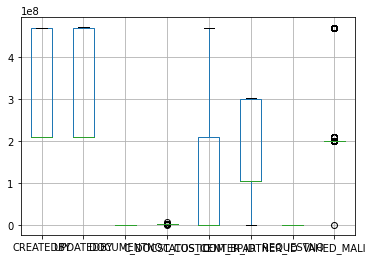

In [11]:
inoutNumberFields = inout.select_dtypes('number')
stud_bplt = inout.boxplot(column = ['CREATEDBY', 'UPDATEDBY', 'DOCUMENTNO','C_DOCSTATUS_ID', 'C_COSTCENTER_ID', 'COM_BPARTNER_ID', 'REQUESTNO', 'VAHED_MALI'])
stud_bplt.plot()
plt.show()

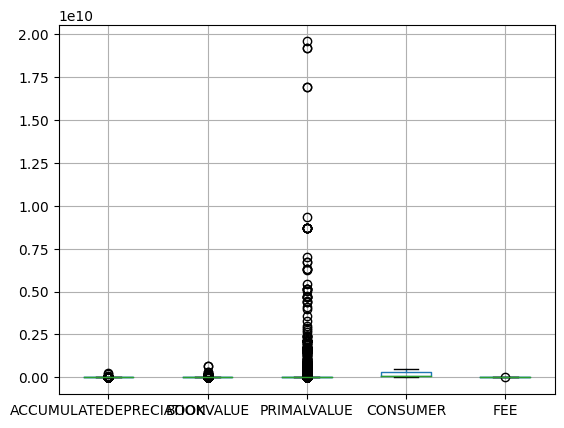

In [12]:
lineNumberFields = line.select_dtypes('number')
stud_bplt = line.boxplot(column = ['ACCUMULATEDEPRECIATION', 'BOOKVALUE', 'PRIMALVALUE', 'CONSUMER', 'FEE'])
stud_bplt.plot()
plt.show()